In [1]:
#It is more likely that finance problems are linear regression problems instead of a classification problems. 
# i.e. predicting stocks given some data in dollars vs predicting an an animal is cat or dog (classification)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error


In [2]:
dataset = pd.read_csv('/Users/ramkgoli/Downloads/AAPL.csv')
dataset['Date'] = pd.to_datetime(dataset.Date,format='%Y-%m-%d')
dataset = dataset.set_index('Date')

In [3]:
dataset.shape

(251, 6)

In [4]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,192.259442,194.316335,190.240637,192.272351,190.642522,3.266469e+07
std,21.168086,21.320783,21.030674,21.096224,20.877074,1.389916e+07
min,143.979996,145.720001,142.000000,142.190002,140.505798,1.136200e+07
25%,174.805000,175.934998,173.555000,174.794998,173.366134,2.303000e+07
50%,196.419998,198.850006,193.820007,197.000000,195.501465,2.974860e+07
75%,207.574997,209.194999,205.274994,207.610001,206.495002,3.890535e+07
max,230.779999,233.470001,229.779999,232.070007,228.523819,9.624670e+07


In [5]:
dataset.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-06,226.229996,227.350006,221.300003,223.100006,219.690903,34290000
2018-09-07,221.850006,225.369995,220.710007,221.300003,217.918411,37619800
2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500
2018-09-11,218.009995,224.300003,216.559998,223.850006,220.429443,35749000
2018-09-12,224.940002,225.000000,219.839996,221.070007,217.691925,49278700


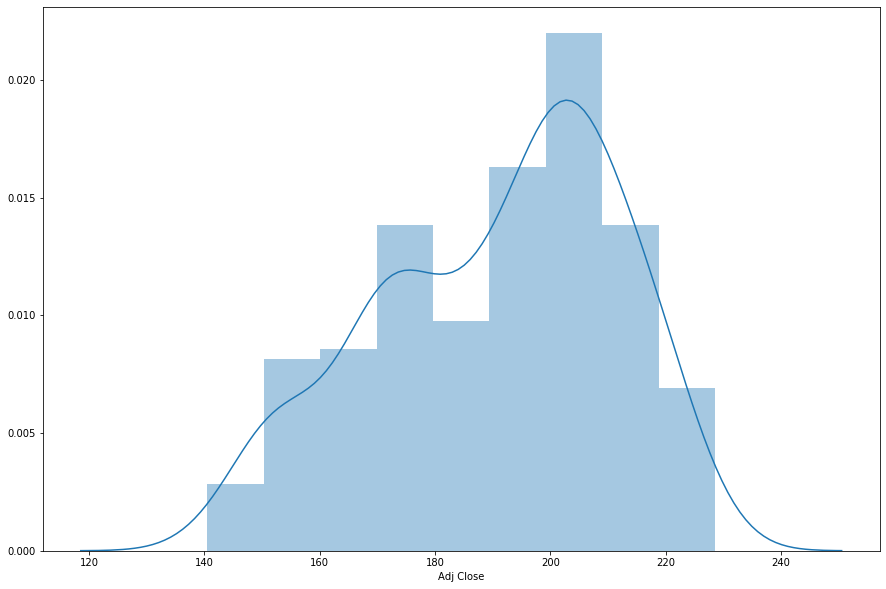

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Adj Close'])


In [53]:
forecast_out = 30 # Number of how many days to forecast
dataset['Prediction'] = dataset['Adj Close'].shift(-forecast_out) #shift dataset by number of days to predict

In [54]:
x = np.array(dataset.drop(['Prediction'], 1))
x = x[:-forecast_out]

In [55]:
y = np.array(dataset['Prediction'])
y = y[:-forecast_out]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [57]:

linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

linear_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)

/Users/ramkgoli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8308.600101696444, tolerance: 6.814799087001976
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
linear_model_score = linear_model.score(x_test, y_test)
print('LinearModel score:', linear_model_score)

ridge_model_score = ridge_model.score(x_test, y_test)
print('RidgeModel score:', ridge_model_score)

lasso_model_score = lasso_model.score(x_test, y_test)
print('LassoModel score:', lasso_model_score)

LinearModel score: 0.46484376818656364
RidgeModel score: 0.4656956984921522
LassoModel score: 0.36523463596397654


In [59]:
x_forecast = np.array(dataset.drop(['Prediction'], 1))[-forecast_out:]
linear_model_forecast_prediction = linear_model.predict(x_forecast)
linear_model_real_prediction = linear_model.predict(np.array(dataset.drop(['Prediction'], 1)))
ridge_model_forecast_prediction = ridge_model.predict(x_forecast)
ridge_model_real_prediction = ridge_model.predict(np.array(dataset.drop(['Prediction'], 1)))
lasso_model_forecast_prediction = lasso_model.predict(x_forecast)
lasso_model_real_prediction = lasso_model.predict(np.array(dataset.drop(['Prediction'], 1)))

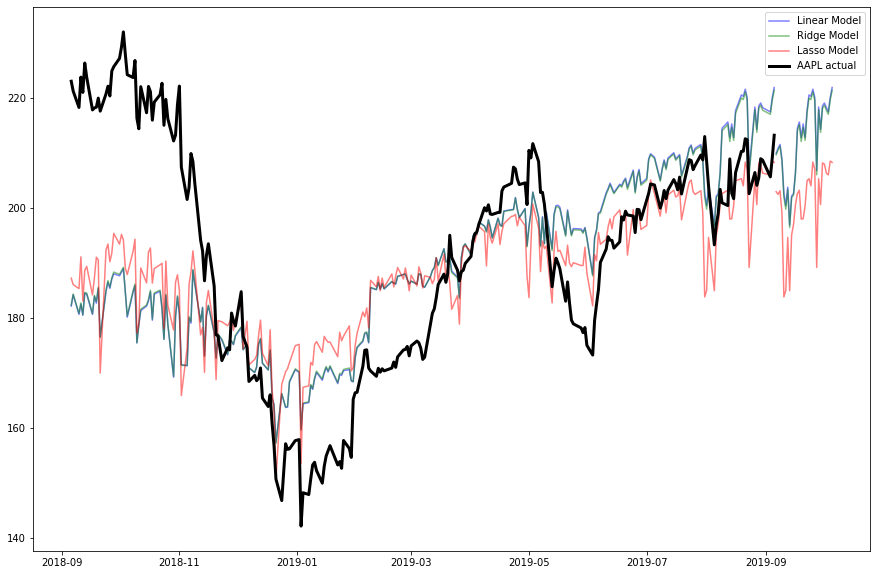

In [62]:

predicted_dates = []
recent_date = dataset.index.max()
alpha = 0.5

for i in range(forecast_out):
    recent_date += timedelta(days=1)
    predicted_dates.append(recent_date)

plt.figure(figsize=(15,10))
plt.plot(dataset.index[0:], linear_model_real_prediction[display_at:], label='Linear Model', c='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_forecast_prediction, c='blue', alpha=alpha)
plt.plot(dataset.index[0:], ridge_model_real_prediction[display_at:], label='Ridge Model', c='green', alpha=alpha)
plt.plot(predicted_dates, ridge_model_forecast_prediction, c='green', alpha=alpha)
plt.plot(dataset.index[0:], lasso_model_real_prediction[display_at:], label='Lasso Model', c='red', alpha=alpha)
plt.plot(predicted_dates, lasso_model_forecast_prediction, c='red', alpha=alpha)
plt.plot(dataset.index[0:], dataset['Close'][0:], label='AAPL actual', c='black', linewidth=3)
plt.legend()
